# Chapter 13: Convolutional Neural Networks

## Exercise 1
What are the advantages of a CNN over a fully connected DNN for image classification?

First of all, CNN's require a lot less parameters than fully connected DNN's. When working with images this can be really noticeable: imagine we have 800x600 pixels images as input, with 3 channels each (RGB). With a fully connected network with a hidden layer of 1000 neurons we will have $800*600*3*1000 = 1.44 * 10^9$ weights to tweak. On the other hand, a CNN with a convolutional layer of 1000 feature maps and a kernel of size 5x5 will have only $5*5*3*1000 = 7.5 * 10^4$ weights.
Another advantage of CNN's is that each neuron only is influenced by some neighbouring neurons (receptive field) of the previous layer. This allow the network to concentrate on low-level features on the lower layers, and combine them into higher level features in the following layers. This works really well with real world images.

## Exercise 2
Consider a CNN composed of three convolutional layers, each with 3x3 kernels, a stride of 2 and same padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200x300 pixels. What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?

Let's start with the total number of parameters. The first layer will have $(3*3*3+1)*100 = 2800$ parameters, the second $(3*3*100+1)*200 = 180200$ and the third $(3*3*200+1)*400 = 720400$, so the total number of parameters will be $2800 + 180200 + 720400 = 903400$<br>
If we are using 32-bit floats, the network will require $((100*100*150) + (200*50*75) + (400*25*37)) * 32 = 83.84 * 10^6$ bits of RAM (around 10MB). If we trin a minibatch of 50 images, it will require 500MB or RAM (10 * 50).

## Exercise 3
If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?

<ol>
    <li>You can use a different data type that requires less bits to store the data (e.g. if you are using 32 bit floats to store each neuron values, try using 16 bit floats).</li>
    <li>You can try to reduce the mini-batch size.</li>
    <li>Another solution could be to use strides to reduce the amount of data that reaches higher layers.</li>
    <li>You can also remove some layers</li>
    <li>There is also the possibility of distributing the network across multiple devices.</li>
</ol>

## Exercise 4
Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

Max pooling layers are made to reduce the computational load of the network by shrinking the input they receive. They don't have weights like convolutional layers.

## Exercise 5
When would you want to add a <i>local response normalization layer</i>?

In order to improve generalization.

## Exercise 6
Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet and ResNet?

The main innovations in AlexNet were to concatenate multiple convolutional layers in top of each other (in LeNet-5 each convolutional layer was followed by a pooling layer), adding local response normalization to some of the convolutional layers, and dropout to the fully connected layers.<br>
The main innovations in GoogLeNet were creating a much deeper CNN thanks to the inception modules, and adding convolutional layers with a kernel size of 1x1 to serve as bottleneck layers.<br>
Finally, ResNet added skip connections and residual leraning.

## Exercise 7
Build your own CNN and try to achieve the highest possible accuracy on MNIST.

In [1]:
from MnistData import MnistData

%matplotlib inline

mnist = MnistData.get_LeNet_data(one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Let's see if the mnist data prepared for the LeNet architecture looks good (it is padded with 0's to have 32x32 pixels).

7

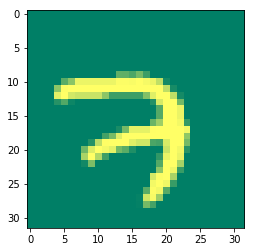

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def visualize(digit, img_width, img_height):
    digit2d = np.reshape(digit, (img_width, img_height))
    plt.imshow(digit2d, cmap='summer')
    
visualize(mnist.train.images[0], 32, 32)
mnist.train.labels[0]

Looks good :)

In [3]:
from LeNet import LeNet

leNet = LeNet()
leNet.fit(mnist.train.images, mnist.train.labels)

0 - Loss: 0.107649 - Best loss: 0.1076492 - Accuracy: 0.967
1 - Loss: 0.075342 - Best loss: 0.0753418 - Accuracy: 0.977
2 - Loss: 0.064524 - Best loss: 0.0645238 - Accuracy: 0.980
3 - Loss: 0.057055 - Best loss: 0.0570546 - Accuracy: 0.982
4 - Loss: 0.052431 - Best loss: 0.0524311 - Accuracy: 0.985
5 - Loss: 0.047797 - Best loss: 0.0477969 - Accuracy: 0.985
6 - Loss: 0.048230 - Best loss: 0.0477969 - Accuracy: 0.987
7 - Loss: 0.047138 - Best loss: 0.0471382 - Accuracy: 0.987
8 - Loss: 0.049032 - Best loss: 0.0471382 - Accuracy: 0.987
9 - Loss: 0.053635 - Best loss: 0.0471382 - Accuracy: 0.987
10 - Loss: 0.050232 - Best loss: 0.0471382 - Accuracy: 0.988
11 - Loss: 0.042459 - Best loss: 0.0424588 - Accuracy: 0.990
12 - Loss: 0.050992 - Best loss: 0.0424588 - Accuracy: 0.987
13 - Loss: 0.056658 - Best loss: 0.0424588 - Accuracy: 0.986
14 - Loss: 0.048618 - Best loss: 0.0424588 - Accuracy: 0.987
15 - Loss: 0.039781 - Best loss: 0.0397815 - Accuracy: 0.990
16 - Loss: 0.049549 - Best loss: 0

In [6]:
from sklearn.metrics import accuracy_score

y_pred = leNet.predict(mnist.test.images)
test_accuracy = accuracy_score(y_pred, mnist.test.labels)
print('Final accuracy: {:.3f}'.format(test_accuracy * 100))

Final accuracy: 98.920


## Exercise 8
Classifying large images using Inception v3:
* Download some images of various animals. Load them in Python, for example using the <i>matplotlib.image.pmimg.imread()</i> function or the <i>scipy.misc.imread()</i> function. Resize and/or crop them to 299x299 picels and ensure that they have just three channels (RGB), with no transparency channel.

* Download the latest pretrained Inception v3 model: the checkpoint is available at https://goo.gl/nxSQvl

* Create the Inception v3 model by calling the <i>inception_v3()</i> function, as shown below. This must be done within an argument scope created by the <i>inception_v3_arg_scope()</i> function. Also, you must set <i>is_training=False</i> and <i>num_classes=1001</i>.

* Open a session and use the Saver to restore the pretrained model checkpoint you downloaded earlier.

* Run the model to classify the images you prepared. Display the top five predictions for each image, along with the estimated probability (the list of class names is available at https://goo.gl/brXRtZ). How accurate is the model?

## Exercise 9
Transfer learning for large image classification.
* Create a trining set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), opr alternatively you can just use an existing dataset, such as the flowers dataset (https://goo.gl/EgJVXZ) or MIT's places dataset (http://places.csail.mit.edu/) (requires registration, and it is huge).

* Write a preprocessing step that will resize and crop the image to 299 x 299, with some randomness for data augmentation.

* Using the pretrained Inception v3 model from the previous exercise, freeze all layers up to the bottleneck layer (i.e., the last layer before the output layer), and replace the output layer with the appropriate number of outputs for your new classification task (e.g., the flowers dataset has five mutually exclusive classes so the output layer must have five neurons and use the softmax activation function).

* Split your dataset into training set and test set. Train the model on the training set and evaluate it on the test set.

## Exercise 10
Go through TensorFlow's DeepDream tutorial (https://goo.gl/4b2s6g). It is a fun way to familiarize yourself with various ways of visualizing the patterns learned by a CNN, and to generate art using Deep Learning.